<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BOSQUES ALEATORIOS**

In [ ]:
import numpy as np
from sklearn import datasets

In [ ]:
#Cargamos dataset de Caner de Seno
dataset = datasets.load_breast_cancer()

In [ ]:
# Definimos los conjuntos de variables independientes (X) y la variable dependiente (y)

#X = dataset.data
X = dataset.data[:,(5,7)]

y = dataset.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#Desde scikit learn importamos el algoritmo de Bosques Aleatorios
from sklearn.ensemble import RandomForestClassifier

algoritmo = RandomForestClassifier(n_estimators=10, criterion ='entropy')

In [ ]:
#Entrenamos el algoritmo
algoritmo.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Realizamos predicciones
y_pred = algoritmo.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusiones')
print(matriz)

Matriz de confusiones
[[40  6]
 [ 6 62]]


In [ ]:
# Calculamos la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9117647058823529


In [ ]:
%matplotlib inline
import pylab as pl
import pandas as pd
import seaborn as sns; sns.set()
from sklearn import preprocessing
from sklearn import datasets

def plot_data(X, y):   #Función para graficar datos (X,y)
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
def plot_decision_region(X, pred_fun):      #Función para visualizar la superficie de decisión de nuestro algoritmo.
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


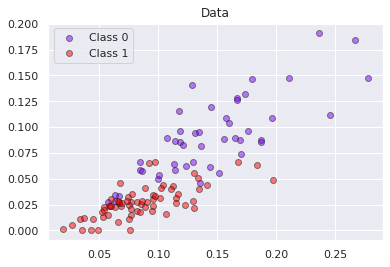

In [ ]:
plot_data(X_test, y_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


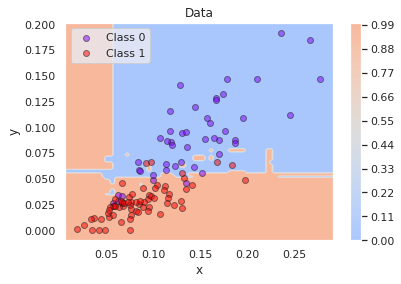

In [ ]:
plot_decision_region(X_test, gen_pred_fun(algoritmo))
plot_data(X_test, y_test)

**Ejercicio**

* Variar el número de árboles y comparar los resultados con la configuración inicial 

* Calcular métricas como recall, F1, ...

* Modificar el criterio del algoritmo.